# Hotel reviews-Sentiment Analysis

The above Project is about the analysing the sentiments of various customers regarding the Hotel by the reviews they have put on the feedback.
We are going to use NLP and ML libraries such as

-NLTK and regex to get the meaningful and necessary text from the reviews


-Matplotlib,Seaborn and Wordclousd to get the visual insights of the data we extracted.


-scikit learn library to process the data for the result using the various algorithms i.e Naive_Bayes,Decision Tree and Random Forest Classifier.

## Load data
We first start by loading the raw data. Each textual reviews is splitted into a positive part and a negative part. We group them together in order to start with only raw text data and no other information.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing warnings to suppress it wherever arises

import warnings
warnings.filterwarnings("ignore")

In [2]:
#accesing the train data
r1=pd.read_csv("D:/Fliprobo/NLP class notebooks/New folder/NLP Projects to do/Project_1/train.csv")
review=pd.DataFrame(r1)

#tagging the train data
review['data']='train'

In [3]:
#accesing the test_data
r2=pd.read_csv("D:/Fliprobo/NLP class notebooks/New folder/NLP Projects to do/Project_1/test.csv")
review_test=pd.DataFrame(r2)

#tagging the test data
review_test['data']='test'

In [4]:
#merging both train and test data
reviews=pd.concat([review,review_test],ignore_index=True)

In [5]:
#Dropping the unnecessary columns here
reviews.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [6]:
#replacing reponse with positive and negative terms
reviews['Is_Response'].replace({'happy' : 'positive', 'not happy' : 'negative'},inplace=True)

In [7]:
reviews

,Description,Is_Response,data
0,The room was kind of clean but had a VERY stro...,negative,train
1,I stayed at the Crown Plaza April -- - April -...,negative,train
2,I booked this hotel through Hotwire at the low...,negative,train
3,Stayed here with husband and sons on the way t...,positive,train
4,My girlfriends and I stayed here to celebrate ...,negative,train
...,...,...,...
68331,I stayed at the hotel and towers for a confere...,NaN,test
68332,Trying to stay within the Marriott family and ...,NaN,test
68333,"We stayed for - nights with our little dog,ver...",NaN,test
68334,Stayed at the Yotel over the weekend and was v...,NaN,test


## Cleaning and Preprocessing

In [8]:
#lets clean the text
import re
import nltk
import string
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
#performing regex operations
reviews['Description']=reviews['Description'].str.replace(r'\[[0-9]*\]',' ')
reviews['Description']=reviews['Description'].str.replace(r'\s+',' ')

reviews['Description'] = reviews['Description'].str.lower()

reviews['Description']=reviews['Description'].str.replace(r'\d',' ')
reviews['Description']=reviews['Description'].str.replace(r'\s+',' ')

reviews.head()

,Description,Is_Response,data
0,the room was kind of clean but had a very stro...,negative,train
1,i stayed at the crown plaza april -- - april -...,negative,train
2,i booked this hotel through hotwire at the low...,negative,train
3,stayed here with husband and sons on the way t...,positive,train
4,my girlfriends and i stayed here to celebrate ...,negative,train


In [10]:
#Applying stopwords and removing punctuations from the text
stop = stopwords.words('english')
reviews['Description'] = reviews['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
reviews['Description']=reviews['Description'].str.translate(str.maketrans('', '', string.punctuation))
reviews.head()

,Description,Is_Response,data
0,room kind clean strong smell dogs generally av...,negative,train
1,stayed crown plaza april april staff frien...,negative,train
2,booked hotel hotwire lowest price could find g...,negative,train
3,stayed husband sons way alaska cruise loved ho...,positive,train
4,girlfriends stayed celebrate th birthdays plan...,negative,train


In [11]:
#Now lets remove the test data so we proceed alongwith train data for model

reviews_train=reviews.loc[reviews["data"]=="train"]
reviews_test=reviews.loc[reviews["data"]=="test"]

reviews_train.drop('data',axis=1,inplace=True)

Lets get some Visualization Insights

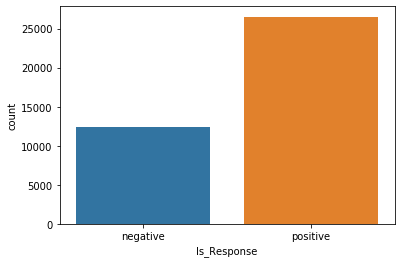

In [12]:
import seaborn as sns

sns.countplot(reviews['Is_Response'])

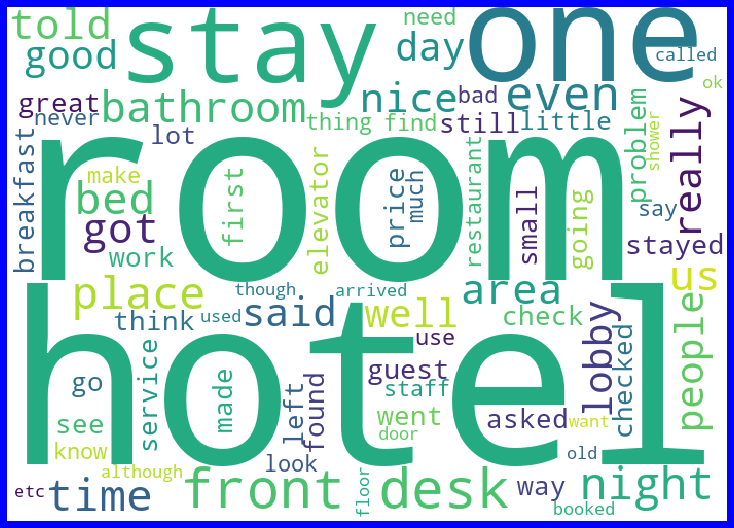

In [18]:
# Wordcloud using negative response as a refernce

from wordcloud import WordCloud

hotel_data = reviews_train['Description'][reviews_train['Is_Response']=='negative']

hotel_cloud = WordCloud(width=700,height=500,background_color='white',max_words=75).generate(' '.join(hotel_data))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(hotel_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

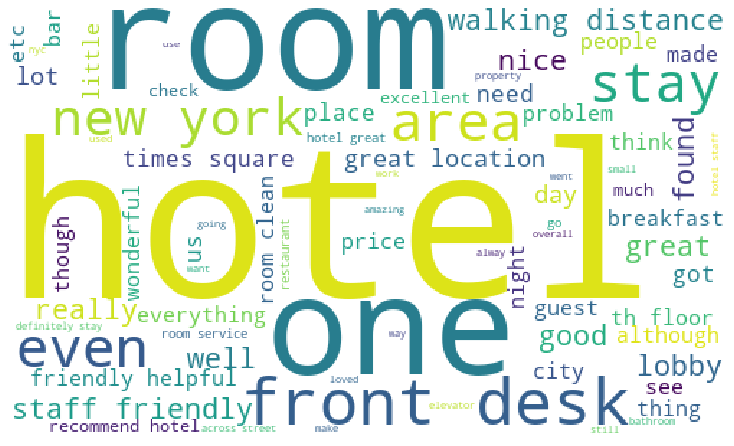

In [19]:
# Wordcloud using positive response as a refernce

from wordcloud import WordCloud
hotel_data = reviews_train['Description'][reviews_train['Is_Response']=='positive']

hotel_cloud = WordCloud(width=500,height=300,background_color='white',max_words=75).generate(' '.join(hotel_data))

plt.figure(figsize=(10,8))
plt.imshow(hotel_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Lets Mould the data for the modelling process

In [20]:
x=reviews_train['Description']
y=reviews_train['Is_Response']

In [21]:
#importing required modules
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_id=TfidfVectorizer()

mnb=MultinomialNB()

In [22]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

In [23]:
#lets use pipeline and get the metrics 
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tf_id)
                 ,('classifier',mnb)])

model.fit(x_train,y_train)
verdict = model.predict(x_test)
print(confusion_matrix(verdict,y_test))
print("Accuracy : ", accuracy_score(verdict,y_test))
print("Classification_report:\n",classification_report(verdict,y_test))

[[ 869   35]
 [1619 5264]]
Accuracy :  0.7875947091306023
Classification_report:
               precision    recall  f1-score   support

    negative       0.35      0.96      0.51       904
    positive       0.99      0.76      0.86      6883

    accuracy                           0.79      7787
   macro avg       0.67      0.86      0.69      7787
weighted avg       0.92      0.79      0.82      7787



Decision tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

model = Pipeline([('vectorizer',tf_id)
                 ,('classifier',dtc)])

model.fit(x_train,y_train)
verdict = model.predict(x_test)
print(confusion_matrix(verdict,y_test))
print("Accuracy : ", accuracy_score(verdict,y_test))
print("Classification_report:\n",classification_report(verdict,y_test))

[[1484 1032]
 [1004 4267]]
Accuracy :  0.7385385899576217
Classification_report:
               precision    recall  f1-score   support

    negative       0.60      0.59      0.59      2516
    positive       0.81      0.81      0.81      5271

    accuracy                           0.74      7787
   macro avg       0.70      0.70      0.70      7787
weighted avg       0.74      0.74      0.74      7787



In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model = Pipeline([('vectorizer',tf_id)
                 ,('classifier',rfc)])

model.fit(x_train,y_train)

verdict = model.predict(x_test)
print(confusion_matrix(verdict,y_test))
print("Accuracy : ", accuracy_score(verdict,y_test))
print("Classification_report:\n",classification_report(verdict,y_test))

[[1475  536]
 [1013 4763]]
Accuracy :  0.801078720945165
Classification_report:
               precision    recall  f1-score   support

    negative       0.59      0.73      0.66      2011
    positive       0.90      0.82      0.86      5776

    accuracy                           0.80      7787
   macro avg       0.75      0.78      0.76      7787
weighted avg       0.82      0.80      0.81      7787



In [26]:
#Applying the model to the test data
reviews_test

,Description,Is_Response,data
38932,looking motel close proximity tv taping dr phi...,NaN,test
38933,walking distance madison square garden penn su...,NaN,test
38934,visited seattle business spent nights vintage...,NaN,test
38935,hotel location excellent rooms clean suite one...,NaN,test
38936,hotel awesome love service anthony really grea...,NaN,test
...,...,...,...
68331,stayed hotel towers conference loved place roo...,NaN,test
68332,trying stay within marriott family wanting pay...,NaN,test
68333,stayed nights little dogvery friendly staff a...,NaN,test
68334,stayed yotel weekend impressed thing liked bes...,NaN,test


In [27]:
#dropping the unnecessary columns
reviews_test.drop(['Is_Response','data'],axis=1,inplace=True)

In [28]:
#Applying the model to the test data
x=reviews_test['Description']
response=model.predict(x) #Here model has random forest classifier as a algorithm from
response

array(['negative', 'positive', 'positive', ..., 'negative', 'positive',
       'positive'], dtype=object)

## Conclusion

In the above project,i import the data and use various nlp techniques to clean amd process the data to extract meaningful texts.Before applying it to the model,we pass it through the TF-IDF vectorizer to converts the words into vectors.On applying various types of ML algorithms,we get the best accuracy score from random Forest Classifier.So we take it as a final ML algorithms for this dataset and applied to the test dataset which we already kept processed.